In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
cd/content/drive/MyDrive/FacialEmotionRecognition

/content/drive/MyDrive/FacialEmotionRecognition


In [ ]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
import os
import random
from tqdm import tqdm
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import Callback, EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten, Dense
from tensorflow.keras.optimizers import Adam,RMSprop,SGD,Adamax
from tensorflow.keras import regularizers

In [ ]:
DATADIR = 'CK+48'
CATEGORIES = os.listdir(DATADIR)
CATEGORIES

['anger', 'contempt', 'sadness', 'disgust', 'surprise', 'happy', 'fear']

In [ ]:
from tqdm import tqdm
def load_data():
    DATADIR = 'CK+48'
    data = []
    # loading training data
    for category in CATEGORIES:
        # create path to image of respective expression
        path = os.path.join(DATADIR, category)
        # get the classification  for each expression 
        class_num = CATEGORIES.index(category)

        for img in tqdm(os.listdir(path)):
            img_array = cv2.imread(os.path.join(path, img), 0)
            data.append([img_array, class_num])
            
    return data

In [ ]:
data = load_data()

100%|██████████| 75/75 [00:24<00:00,  3.11it/s]


In [ ]:
X = np.array([ x[0] for x in data])
y = np.array([Y[1] for Y in data])

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0, shuffle = True)
X_Test, X_val, y_Test, y_val = train_test_split(X_test, y_test, test_size=0.5, random_state=0, shuffle = True)

In [ ]:
print("X_train shape: ", X_train.shape)
print("y_train shape: ", y_train.shape)
print("-------------------------------")
print("X_Test shape: ", X_Test.shape)
print("y_Test shape: ", y_Test.shape)
print("-------------------------------")
print("X_val shape: ", X_val.shape)
print("y_val shape: ", y_val.shape)

X_train shape:  (784, 48, 48)
y_train shape:  (784,)
-------------------------------
X_Test shape:  (98, 48, 48)
y_Test shape:  (98,)
-------------------------------
X_val shape:  (99, 48, 48)
y_val shape:  (99,)


In [ ]:
# reshaping y_train and y_test
y_train = np.reshape(y_train, (len(y_train),1))
y_Test  = np.reshape(y_Test , (len(y_Test ),1))
y_val  = np.reshape(y_val , (len(y_val),1))

print("After reshaping")
print("y_train shape: ", y_train.shape)
print("y_Test shape: ", y_Test.shape)
print("y_val shape: ", y_val.shape)

After reshaping
y_train shape:  (784, 1)
y_Test shape:  (98, 1)
y_val shape:  (99, 1)


In [ ]:
X_train = np.expand_dims(X_train, axis=3)
X_Test = np.expand_dims(X_Test, axis=3)
X_val = np.expand_dims(X_val, axis=3)

print("After adding color channel")
print("X_train shape: ", X_train.shape)
print("X_Test shape: ", X_Test.shape)
print("X_val shape: ", X_val.shape)

After adding color channel
X_train shape:  (784, 48, 48, 1)
X_Test shape:  (98, 48, 48, 1)
X_val shape:  (99, 48, 48, 1)


In [ ]:
X_train = X_train / 255.0
X_Test = X_Test / 255.0
X_val = X_val / 255.0

In [ ]:
y_train = tf.keras.utils.to_categorical(y_train)
y_Test = tf.keras.utils.to_categorical(y_Test)
y_val = tf.keras.utils.to_categorical(y_val)
y_train.shape, y_Test.shape, y_val.shape

((784, 7), (98, 7), (99, 7))

In [ ]:
def create_model(input_shape=None):
    if input_shape is None :
        input_shape=(48,48,1)

    model = Sequential()
    model.add(Conv2D(6, (3, 3), input_shape=input_shape, padding='same', activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(16, (3, 3), padding='same', activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Conv2D(64, (3, 3), activation = 'relu'))
    model.add(MaxPool2D(pool_size=(2, 2)))

    model.add(Flatten())
    model.add(Dense(128, activation = 'relu'))
    model.add(Dropout(0.2))
    model.add(Dense(7, activation = 'softmax'))
    
    return model 

In [ ]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 989 kB 7.1 MB/s 


In [ ]:
CNN_MODEL= create_model()
CNN_MODEL.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 48, 48, 6)         60        
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 24, 24, 6)        0         
 2D)                                                             
                                                                 
 conv2d_7 (Conv2D)           (None, 24, 24, 16)        880       
                                                                 
 max_pooling2d_7 (MaxPooling  (None, 12, 12, 16)       0         
 2D)                                                             
                                                                 
 conv2d_8 (Conv2D)           (None, 10, 10, 64)        9280      
                                                                 
 max_pooling2d_8 (MaxPooling  (None, 5, 5, 64)        

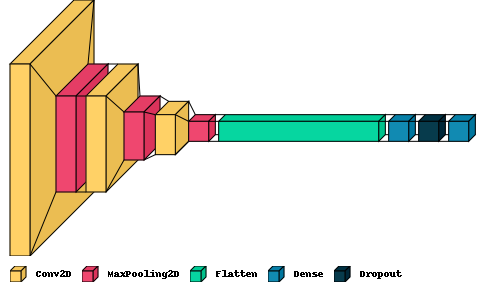

In [ ]:
import visualkeras
from PIL import ImageFont
visualkeras.layered_view(CNN_MODEL, legend=True)

In [ ]:
CNN_MODEL.compile(loss='categorical_crossentropy', metrics=['accuracy'], optimizer=Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-7) )

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


In [ ]:
history = CNN_MODEL.fit(X_train, y_train, batch_size=8 , epochs=50, validation_data = (X_val, y_val) )

Epoch 1/50
98/98 [==============================] - 1s 6ms/step - loss: 1.7612 - accuracy: 0.2895 - val_loss: 1.6360 - val_accuracy: 0.3737
Epoch 2/50
98/98 [==============================] - 0s 4ms/step - loss: 1.1704 - accuracy: 0.5969 - val_loss: 0.8379 - val_accuracy: 0.7172
Epoch 3/50
98/98 [==============================] - 0s 4ms/step - loss: 0.7568 - accuracy: 0.7296 - val_loss: 0.6200 - val_accuracy: 0.8081
Epoch 4/50
98/98 [==============================] - 0s 4ms/step - loss: 0.4668 - accuracy: 0.8482 - val_loss: 0.3686 - val_accuracy: 0.8687
Epoch 5/50
98/98 [==============================] - 0s 4ms/step - loss: 0.3971 - accuracy: 0.8610 - val_loss: 0.3576 - val_accuracy: 0.8788
Epoch 6/50
98/98 [==============================] - 0s 4ms/step - loss: 0.2783 - accuracy: 0.8954 - val_loss: 0.2270 - val_accuracy: 0.8990
Epoch 7/50
98/98 [==============================] - 0s 4ms/step - loss: 0.2378 - accuracy: 0.9184 - val_loss: 0.1745 - val_accuracy: 0.9192
Epoch 8/50
98/98 [==

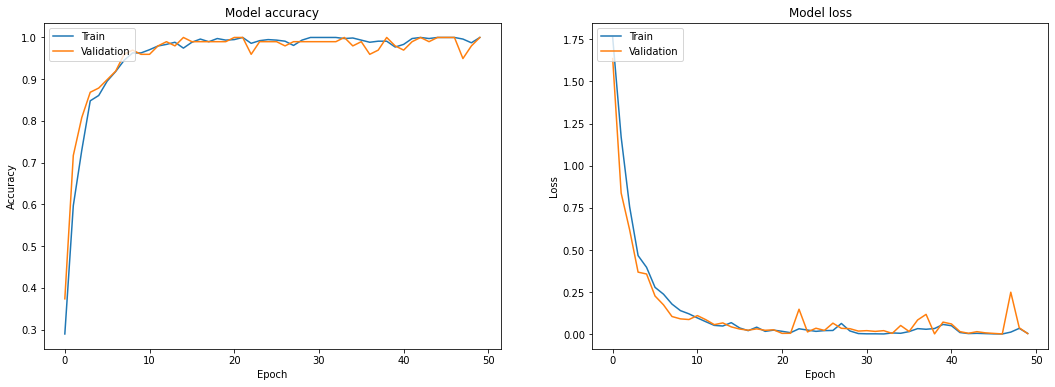

In [ ]:
fig, axes = plt.subplots(1,2, figsize=(18, 6))
# Plot training & validation accuracy values
axes[0].plot(history.history['accuracy'])
axes[0].plot(history.history['val_accuracy'])
axes[0].set_title('Model accuracy')
axes[0].set_ylabel('Accuracy')
axes[0].set_xlabel('Epoch')
axes[0].legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
axes[1].plot(history.history['loss'])
axes[1].plot(history.history['val_loss'])
axes[1].set_title('Model loss')
axes[1].set_ylabel('Loss')
axes[1].set_xlabel('Epoch')
axes[1].legend(['Train', 'Validation'], loc='upper left')
plt.show()

In [ ]:
test_accuracy = CNN_MODEL.evaluate(X_Test, y_Test, verbose = 0)[1]
print("Test Accuracy on CK+ :", test_accuracy)

Test Accuracy on CK+ : 1.0


In [ ]:
CNN_MODEL.save('BestCK+.h5')

actual is sadness
predicted is sadness


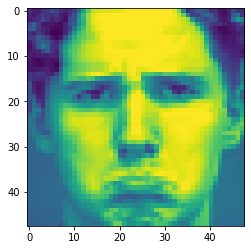

In [ ]:
import tensorflow as tf
from IPython.display import clear_output
test_true = np.argmax(y_Test, axis=1)
from IPython.display import clear_output
import time

for k in range(20):
  print(f'actual is {CATEGORIES[test_true[k]]}')
  predicted_label = CNN_MODEL.predict(tf.expand_dims(X_Test[k],0)).argmax()
  print(f'predicted is {CATEGORIES[predicted_label]}')
  plt.imshow(X_Test[k].reshape(48,48))
  plt.show()
  time.sleep(7)
  clear_output(wait=True)